In [39]:
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cfgrib

folder_data = "/Odyssey/private/t22picar/data/era5/"
file_glorys = "era5_2019-2021_hourly.grib" # Actually not glorys 

maps_glorys = xr.open_dataset(folder_data+file_glorys, engine="cfgrib")
maps_glorys['longitude'] = xr.where(maps_glorys['longitude'] > 180, maps_glorys['longitude'] - 360, maps_glorys['longitude'])
lat_simu = maps_glorys.latitude.values
lon_simu = maps_glorys.longitude.values
#maps_glorys.longitude.values = lon_simu



In [40]:
folder_data_4th = "/Odyssey/private/t22picar/data/glorys_15m/"
file_glorys_4th = "glorys_15.81m_2019-01-01-2020-01-01_4th.nc"
maps_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)
lat_ref = maps_4th.lat
lon_ref = maps_4th.lon

maps_glorys = maps_glorys.rename({"latitude": "lat"})
maps_glorys = maps_glorys.rename({"longitude": "lon"})

# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=maps_4th.lat.min(), stop=maps_4th.lat.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=maps_4th.lon.min(), stop=maps_4th.lon.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da

new sizes: [680, 1440]


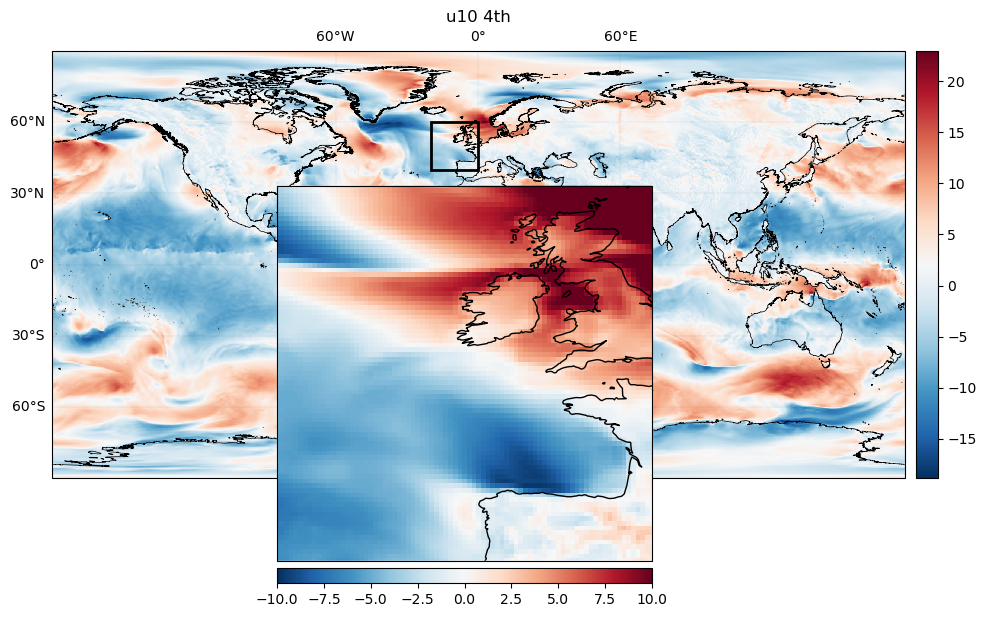

In [42]:
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_map_zoom

plot_map_zoom(maps_glorys.u10[0],maps_glorys.lon.values,maps_glorys.lat.values,title="u10 4th",vmin=-10,vmax=10)

In [13]:
# Daily mean wind
maps_glorys = maps_glorys.resample(time='1D').mean()

In [6]:
# Interpolation new grid
maps_glorys_4th = regrid_da(new_sizes,maps_glorys)

In [15]:
#Check 
maps_glorys_4th

<xarray.Dataset> Size: 16MB
Dimensions:  (time: 1, lat: 680, lon: 1440)
Coordinates:
    number   int64 8B 0
    step     timedelta64[ns] 8B 00:00:00
    surface  float64 8B 0.0
  * time     (time) datetime64[ns] 8B 2019-01-01
  * lat      (lat) float64 5kB -90.0 -89.73 -89.47 -89.2 ... 89.47 89.73 90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    u10      (time, lat, lon) float64 8MB 0.3146 0.3146 ... -0.5075 -0.5075
    v10      (time, lat, lon) float64 8MB -0.03283 -0.03283 ... 0.08761 0.08761
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-23T09:21 GRIB to CDM+CF via cfgrib-0.9.1...

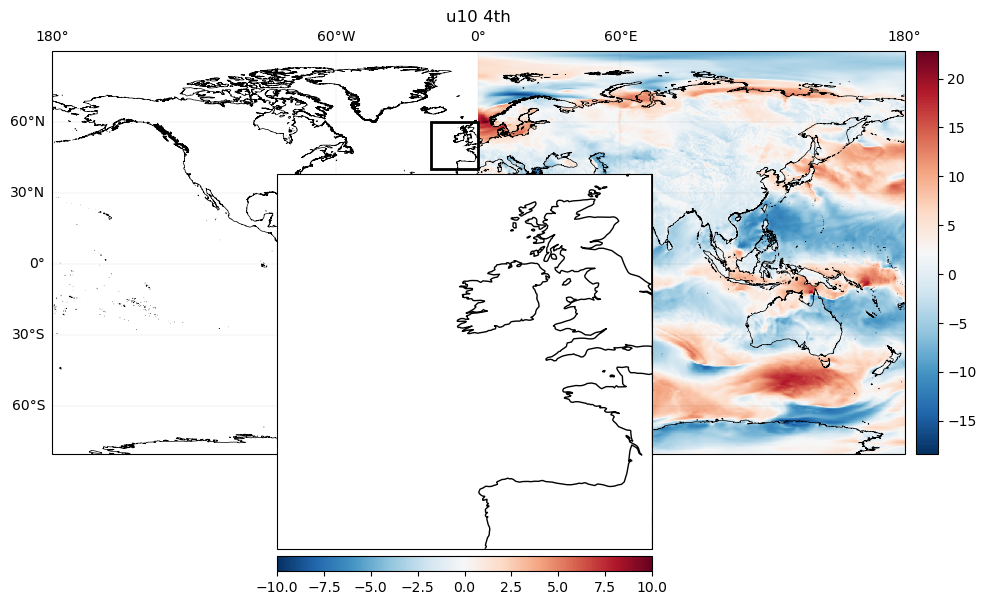

In [7]:
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_map_zoom

plot_map_zoom(maps_glorys_4th.u10[0],maps_glorys_4th.lon.values,maps_glorys_4th.lat.values,title="u10 4th",vmin=-10,vmax=10)

In [17]:
# save data 
save_file=file_glorys[:-5]+"_4th"+".nc"
# Sauvegarder le DataArray en fichier NetCDF
maps_glorys_4th.to_netcdf(folder_data+save_file)


In [ ]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cfgrib

folder_data = "/Odyssey/private/t22picar/data/era5/"
#file_glorys = "era5_2019-2021_hourly.grib" # Actually not glorys 
file_glorys = "f1de6c8045938f1041adee05ae6a92ad.grib"
maps_glorys = xr.open_dataset(folder_data+file_glorys, engine="cfgrib")
lat_simu = maps_glorys.latitude.values
lon_simu = maps_glorys.longitude.values - 180 

folder_data_4th = "/Odyssey/private/t22picar/data/glorys_15m/"
file_glorys_4th = "glorys_15.81m_2019-01-01-2020-01-01_4th.nc"
maps_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)
lat_ref = maps_4th.lat
lon_ref = maps_4th.lat

maps_glorys = maps_glorys.rename({"latitude": "lat"})
maps_glorys = maps_glorys.rename({"longitude": "lon"})

# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=lat_ref.min(), stop=lat_ref.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=lon_ref.min(), stop=lon_ref.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da

# Daily mean wind
maps_glorys = maps_glorys.resample(valid_time='1D').mean()

# Interpolation new grid
maps_glorys_4th = regrid_da(new_sizes,maps_glorys)

#Split into two files
maps_glorys_4th = maps_glorys_4th.drop("number").drop("step").drop("surface").rename({"valid_time": "time"})
tstart = "20-01-2020"
tend= "20-04-2021"
maps_glorys_train = maps_glorys.sel(time=slice(tstart,tend))

Can't create file '/Odyssey/private/t22picar/data/era5/f1de6c8045938f1041adee05ae6a92ad.grib.5b7b6.idx'
Traceback (most recent call last):
  File "/Odyssey/private/t22picar/miniforge3/envs/4dvarnet-daniel/lib/python3.10/site-packages/cfgrib/messages.py", line 539, in from_indexpath_or_filestream
    self = cls.from_fieldset(filestream, index_keys, computed_keys)
  File "/Odyssey/private/t22picar/miniforge3/envs/4dvarnet-daniel/lib/python3.10/site-packages/cfgrib/messages.py", line 379, in from_fieldset
    return cls.from_fieldset_and_iteritems(fieldset, iteritems, index_keys, computed_keys)
  File "/Odyssey/private/t22picar/miniforge3/envs/4dvarnet-daniel/lib/python3.10/site-packages/cfgrib/messages.py", line 392, in from_fieldset_and_iteritems
    for field_id, raw_field in iteritems:
  File "/Odyssey/private/t22picar/miniforge3/envs/4dvarnet-daniel/lib/python3.10/site-packages/cfgrib/messages.py", line 292, in __iter__
    for message in self.itervalues():
  File "/Odyssey/private/t

FileNotFoundError: [Errno 2] No such file or directory: '/Odyssey/private/t22picar/data/era5/f1de6c8045938f1041adee05ae6a92ad.grib'